['d ' 'h ' 's ' 's ' 'd ' 'h ' 's ' 'd ' 's ' 'o ' 'd ' 'o ' 'o ' 'd '
 's ' 'o ' 'o ' 'd ' 's ' 'h ' 'o ' 'd ' 's ' 'h ' 'd ' 's ' 'o ' 'd '
 'd ' 'd ' 'd ' 's ' 'o ' 's ' 'd ' 'd ' 'd ' 'd ' 'o ' 'd ' 'd ' 'd '
 's ' 's ' 'h ' 'd ' 'd ' 'o ' 'd ' 'h ' 'd ' 's ' 's ' 'd ' 'h ' 's '
 'o ' 'd ' 's ' 'h ' 'd ' 'd ' 'o ' 'o ' 's ' 's ' 'h ' 'd ' 'd ' 'h '
 'o ' 'o ' 'o ' 's ' 'h ' 's ' 'd ' 'o ' 'h ' 's ' 'd ' 'd ' 'o ' 'd '
 'o ' 'h ' 'd ' 'd ' 's ' 'o ' 'd ' 's ' 'o ' 'd ' 'd ' 's ' 'o ' 'h '
 'o ' 's ' 'd ' 'o ' 'h ' 's ' 'h ' 'h ' 'h ' 'd ' 's ' 's ' 'd ' 'o '
 'd ' 'd ' 's ' 'o ' 's ' 'h ' 's ' 's ' 's ' 's ' 'd ' 'd ' 's ' 's '
 's ' 's ' 'h ' 'd ' 's ' 's ' 'o ' 's ' 'h ' 'd ' 'o ' 's ' 'd ' 's '
 's ' 'h ' 's ' 'h ' 's ' 'd ' 'd ' 's ' 'h ' 'd ' 's ' 'h ' 's ' 'd '
 'o ' 'd ' 's ' 'd ' 'd ' 's ' 'o ' 'd ' 'o ' 's ' 'd ' 'h ' 's ' 's '
 'o ' 'd ' 's ' 'h ' 's ' 'h ' 's ' 's ' 'h ' 'd ' 'h ' 'd ' 's ' 's '
 'h ' 's ' 'h ' 's ' 'd ' 'o ' 's ' 's ' 's ' 's ' 'h ' 'd ' 'd ' 'd '
 's ' 

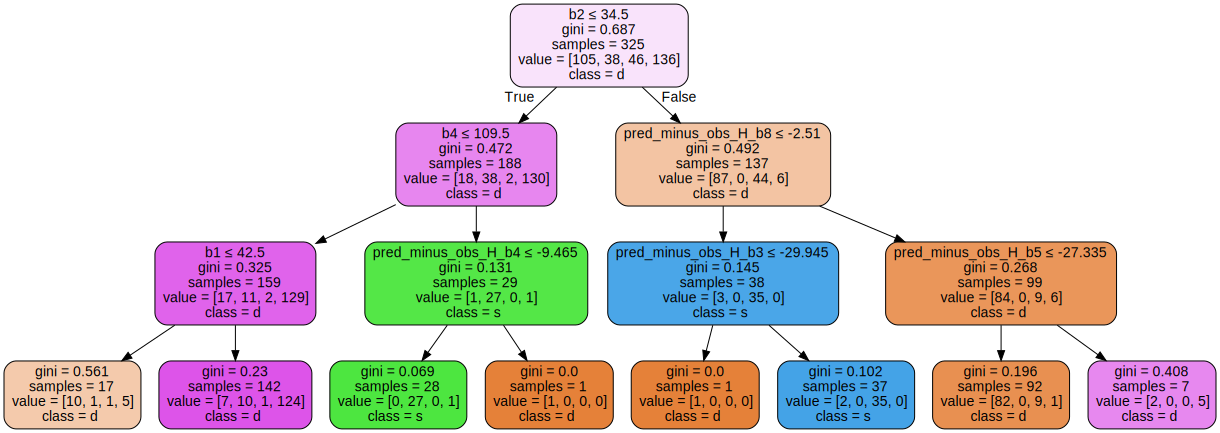

In [1]:
#Exchanging the Training and testing set results to construct the decision trees mentioned below. Just like part A the attributes taken are by limiting the max depth and adding the criterion of entropy.

import pandas as pd # Package for importing the raw data
import numpy as np # Package for Scientific computing - array

from sklearn import tree  #Machine Learning package for python for DECISION TREES
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#import scipy import misc
import io
import pydotplus

from matplotlib import pyplot as plt

import graphviz   # Package for visual representation of Decision Trees
import pydot
from sklearn.externals.six import StringIO
from matplotlib import pyplot as plt
import seaborn as sns

train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')
features=train.columns[1:]
#print(features)

features= ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9',
       'pred_minus_obs_H_b1', 'pred_minus_obs_H_b2', 'pred_minus_obs_H_b3',
       'pred_minus_obs_H_b4', 'pred_minus_obs_H_b5', 'pred_minus_obs_H_b6',
       'pred_minus_obs_H_b7', 'pred_minus_obs_H_b8', 'pred_minus_obs_H_b9',
       'pred_minus_obs_S_b1', 'pred_minus_obs_S_b2', 'pred_minus_obs_S_b3',
       'pred_minus_obs_S_b4', 'pred_minus_obs_S_b5', 'pred_minus_obs_S_b6',
       'pred_minus_obs_S_b7', 'pred_minus_obs_S_b8', 'pred_minus_obs_S_b9']

X_train= train [features];  # X_train is list of all 27 features/attributes from the training set
Y_train= train["class"]     # Y_train contains the label column 1 that has different classes/labels based on attributes

X_test= test [features];
Y_test= test ["class"]

clf = tree.DecisionTreeClassifier(max_depth=3)  #min_samples_split=2 criterion='entropy'
dt = clf.fit(X_test, Y_test)
#print ("Decision Tree Trained !")

#Making predictions on the test data
YY_predict=clf.predict(X_train)

print (YY_predict)

from sklearn.metrics import accuracy_score
score2=accuracy_score(Y_train, YY_predict)*100
print ("The Accuracy of the Decision Tree is: ", round(score2, 2), "%")
print(" ")
from sklearn.metrics import confusion_matrix
print("Confusiton Matrix:")
print(" ")
print(confusion_matrix(Y_train, YY_predict))

dot_data = tree.export_graphviz(clf, out_file=None, 
feature_names=features,class_names=Y_test,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph